In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                '/breast-cancer-wisconsin/wdbc.data', header=None)

In [5]:
print('rows, columns:', df.shape)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.transform(['M', 'B'])

array([1, 0])

in this section, we will briefly go over some of the techniques that could help with imbalanced datasets. But before we discuss different methods to approach this problem, let's create an imbalanced dataset from our dataset, which originally consisted of 357 benign tumors (class 0) and 212 malignant tumors (class 1):

In [10]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [11]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [12]:
from sklearn.utils import resample

In [13]:
print('Number of class 1 examples before:',X_imb[y_imb == 1].shape[0])

Number of class 1 examples before: 40


In [14]:
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],y_imb[y_imb == 1],
                                    replace=True,n_samples=X_imb[y_imb == 0].shape[0],random_state=123)
print('Number of class 1 examples after:',X_upsampled.shape[0])

Number of class 1 examples after: 357


After resampling, we can then stack the original class 0 samples with the upsampled
class 1 subset to obtain a balanced dataset as follows:

In [15]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [17]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

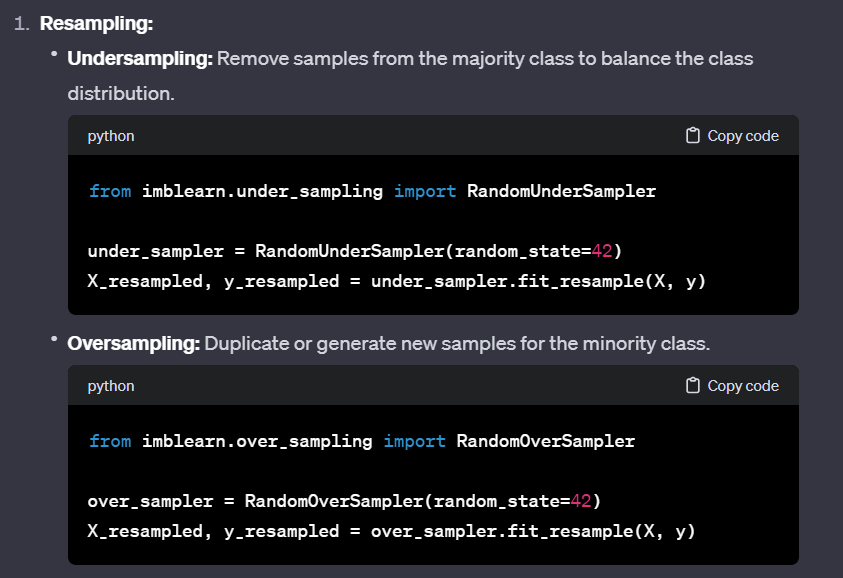

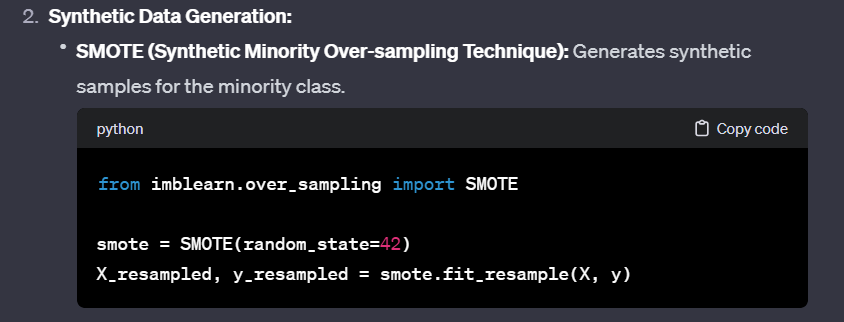

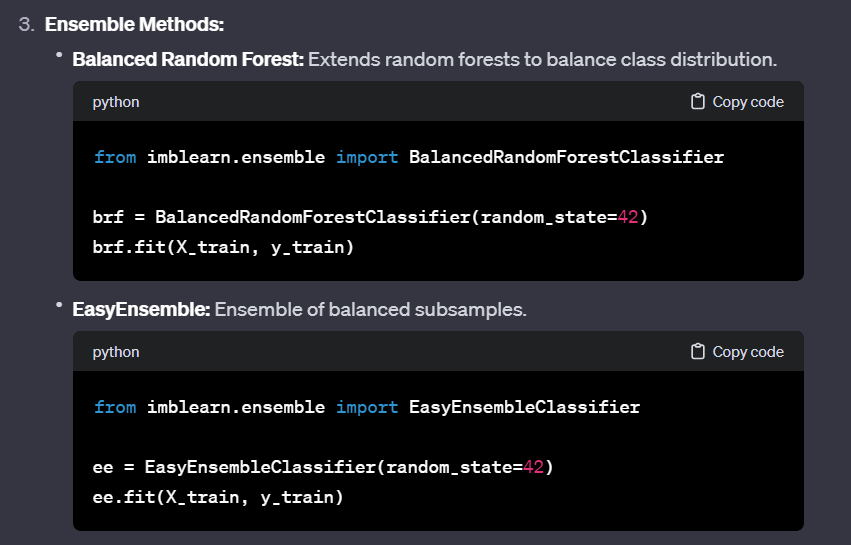

# Resampling Techniques:

## Undersampling:

When the majority class has a large number of instances, and there is a need to reduce training time and resource requirements.
When the majority class instances are redundant or similar.

## Oversampling:

When the dataset is small, and you want to augment the minority class with synthetic examples.
When you want to ensure that the minority class is well-represented in the training set.

## Synthetic Data Generation:

### SMOTE:
When you want to create synthetic instances for the minority class to balance the class distribution.
When the minority class instances are not well-represented in the dataset.

## Ensemble Methods:

### Balanced Random Forest:

When you want to use an ensemble approach and balance the class distribution simultaneously.
When there is a need for feature importance estimation.

### EasyEnsemble:

When you want to create an ensemble of balanced subsamples.
When you have limited computational resources.

### Cost-sensitive Learning:

When you want to modify the algorithm's cost function to penalize misclassifying the minority class more than the majority class.
When you have a clear understanding of the misclassification costs associated with each class.

### Evaluation Metrics:

Always, regardless of the technique used, evaluate your model using metrics like precision, recall, F1-score, or AUC-ROC that are sensitive to the minority class.
Use the appropriate metric based on the specific requirements of your application.

### Anomaly Detection:

When the minority class is considered an anomaly or rare event.
When the minority class instances are fundamentally different from the majority class instances.